In [4]:
import serial
from openpyxl import Workbook
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re



## Python para obtenção, processamento e validação dos dados

In [5]:
# Configuração da porta serial (ajuste conforme necessário)
porta_serial = 'COM3'      # No Linux/Mac: '/dev/ttyUSB0' ou '/dev/ttyACM0'
baud_rate = 115200           # Deve ser igual ao do seu código no STM32
dados_lista = []
MAX_AMOSTRAS = 1000


## Análise de espaçamento no tempo das amostras

Nessa seção são obtidas 200 amostras (palavras digitais 24 bits) de duas células de carga para verificar o espaçamento no tempo e garantir a sincronicidade no tempo de amostragem

Nessa seção deve-se utilizar o código de STM32 getData.ino

In [55]:


# Abre a porta serial
ser = serial.Serial(porta_serial, baud_rate, timeout=1)

#Aquisição de dados (palavra digital 1, tempo de aquisição 1, palavra digital 2, tempo de aquisição 2)
print(f"Coletando dados MAX_AMOSTRAS e salvando em dados_lista...") #se quiser salvar no excel trocar dados_lista por {nome_arquivo}
try:
    while len(dados_lista) < MAX_AMOSTRAS:
        if ser.in_waiting > 0:
            linha = ser.readline().decode('utf-8').strip()
            if linha:
                dados = linha.split(',')
                if len(dados) == 4:
                    try:
                        # Converte os valores para números
                        cel_med1 = float(dados[0])  # ou int(dados[0]) se for inteiro
                        tempo1 = float(dados[1])
                        cel_med2 = float(dados[2])
                        tempo2 = float(dados[3])

                        # Armazena como dicionário
                        dados_lista.append({
                            "Medição Cél 1": cel_med1,
                            "Tempo de Aquisição 1": tempo1,
                            "Medição Cél 2": cel_med2,
                            "Tempo de Aquisição 2": tempo2
                        })
                        
                        # # Adiciona os valores numéricos ao Excel
                        # ws.append([cel_med1, tempo1, cel_med2, tempo2])
                        print(f"Dados numéricos: {[cel_med1, tempo1, cel_med2, tempo2]}")
                        
                    except ValueError as e:
                        print(f"Erro na conversão: {e}. Linha ignorada: {linha}")
                else:
                    print(f"Formato inválido (ignorado): {linha}")
finally:
    ser.close()
    # wb.save(nome_arquivo)  # Salva o arquivo


Coletando dados MAX_AMOSTRAS e salvando em dados_lista...
Dados numéricos: [10392.0, 410.0, 2433.0, 404.0]
Dados numéricos: [10362.0, 504.0, 2434.0, 495.0]
Dados numéricos: [10319.0, 599.0, 2419.0, 586.0]
Dados numéricos: [10307.0, 693.0, 2423.0, 677.0]
Dados numéricos: [10337.0, 787.0, 2406.0, 769.0]
Dados numéricos: [10312.0, 881.0, 2402.0, 860.0]
Dados numéricos: [10315.0, 976.0, 2411.0, 951.0]
Dados numéricos: [10333.0, 1070.0, 2408.0, 1042.0]
Dados numéricos: [10304.0, 1164.0, 2396.0, 1133.0]
Dados numéricos: [10273.0, 1258.0, 2396.0, 1224.0]
Dados numéricos: [10341.0, 1352.0, 2400.0, 1315.0]
Dados numéricos: [10366.0, 1447.0, 2411.0, 1406.0]
Dados numéricos: [10291.0, 1541.0, 2404.0, 1497.0]
Dados numéricos: [10271.0, 1635.0, 2415.0, 1588.0]
Dados numéricos: [10311.0, 1729.0, 2420.0, 1679.0]
Dados numéricos: [10307.0, 1823.0, 2416.0, 1770.0]
Dados numéricos: [10288.0, 1918.0, 2422.0, 1861.0]
Dados numéricos: [10337.0, 2012.0, 2429.0, 1952.0]
Dados numéricos: [10359.0, 2106.0, 241

[  410.   504.   599. ... 94003. 94094. 94185.]
   Medição Cél 1  Tempo de Aquisição 1  Medição Cél 2  Tempo de Aquisição 2
0        10392.0                 410.0         2433.0                 404.0
1        10362.0                 504.0         2434.0                 495.0
2        10319.0                 599.0         2419.0                 586.0
3        10307.0                 693.0         2423.0                 677.0
4        10337.0                 787.0         2406.0                 769.0


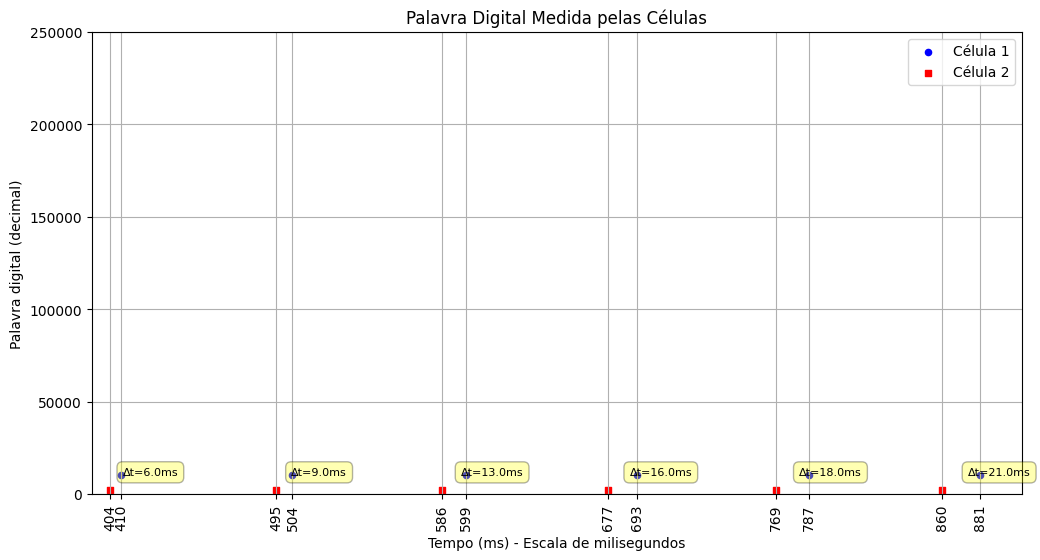

In [61]:

ser.close()

df = pd.DataFrame(dados_lista)
# 2. Extrair colunas com alta precisão
tempos1 = df["Tempo de Aquisição 1"].values
celulas1 = df["Medição Cél 1"].values
tempos2 = df["Tempo de Aquisição 2"].values
celulas2 = df["Medição Cél 2"].values

# 3. Configurar o gráfico
plt.figure(1, figsize=(12, 6))
# Plotar Célula 1 (pontos azuis)
plt.scatter(
    tempos1, 
    celulas1, 
    label="Célula 1", 
    color="blue", 
    s=20, 
    marker= 'o', 
    alpha=1
)

# Plotar Célula 2 (pontos vermelhos)
plt.scatter(
    tempos2, 
    celulas2, 
    label="Célula 2", 
    color="red", 
    s=20, 
    marker='s', 
    alpha= 1
)

# 4. Ajustar eixos para alta resolução
plt.title("Palavra Digital Medida pelas Células")
plt.xlabel("Tempo (ms) - Escala de milisegundos")
plt.ylabel("Palavra digital (decimal)")
plt.legend()
plt.grid(True)

all_times = np.concatenate([tempos1, tempos2])
print(all_times)

plt.xticks(all_times, rotation=90)

# 5. Aplicar zoom em um intervalo específico (ex: 0.1s de dados)
tempo_inicial = min(tempos1[0], tempos2[0])  # Começo dos dados


plt.xlim(tempo_inicial - 10, tempo_inicial + 500)  # Zoom nos primeiros 100ms
plt.ylim(0, 250000)

for t1, t2, y1, y2 in zip(tempos1, tempos2, celulas1, celulas2): 
    delta_t = abs(t2-t1)
    plt.annotate(f'Δt={delta_t}ms', 
                 xy=((t1 + t2)/2, (y1 + y2)/2),  # Posição da anotação (ponto médio)
                 xytext=(5, 5), 
                 textcoords='offset points',
                 fontsize=8,
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

print(df.head())
# 7. Salvar e mostrar
#plt.savefig("grafico_alta_resolucao.png", dpi=300)
plt.show()

## Código para interpolação dos dados
Interpola as palavras digitais para garantir sincronicidade das amostras
São utilizadas curvas de grau 2 e grau 1 para interpolação

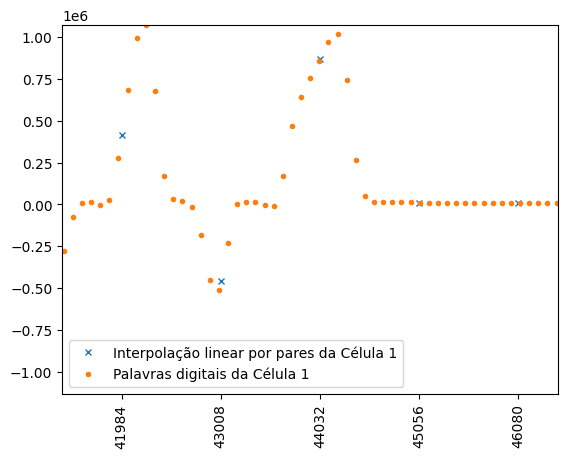

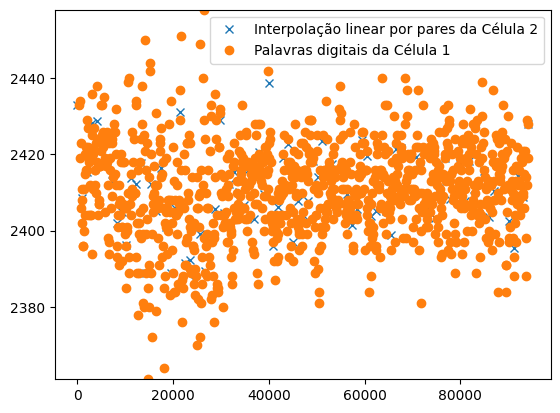

In [92]:
#Código para interpolação no tempo dos dados obtidos

h = 1024 #tempo de amostragem em milisegundos


#cria vetor de tempos de amostragem
T = np.arange(0, max(tempos1), h)

amostras_interp1 = np.interp(T, tempos1, celulas1)
amostras_interp2 = np.interp(T, tempos2, celulas2)

plt.figure(1)
plt.plot(T, amostras_interp1, 'x',markersize=4, label='Interpolação linear por pares da Célula 1')
plt.plot(tempos1, celulas1, 'o',markersize=3, label='Palavras digitais da Célula 1')
plt.xticks(T, rotation=90)

plt.ylim(min(celulas1), max(celulas1))
plt.xlim(min(tempos1) + 40*h,min(tempos1)+45*h)
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.plot(T, amostras_interp2, 'x', label='Interpolação linear por pares da Célula 2')
plt.plot(tempos2, celulas2, 'o', label='Palavras digitais da Célula 1')

plt.ylim(min(celulas2), max(celulas2))
#plt.xlim(min(tempos2), min(tempos2) + 4*h)
plt.legend()
plt.show()

### Seção para analisar distribuição das palavras digitais
Nessa seção vão ser formados os histogramas de medições para 3 pesos distintos aplicados às células de carga
O objetivo é analisar a distribuição probabilística dos sensores de aquisição de dados. 

Nessa seção é preciso utilizar o código de STM32 getDistData.ino

In [6]:
# Lista de pesos a testar
pesos = [400, 500, 600]  # Ajuste conforme NUM_PESOS
NUM_MEDICOES = 300 #DEVE SER IGUAL AO QUE CONSTA NO CÓDIGO DO ARDUINO getDataDist.ino
NUM_PESOS = 3 #DEVE SER IGUAL AO QUE CONSTA NO CÓDIGO DO ARDUINO getDataDist.ino

#lista para armazenar dados
dados = []

#método para coordenar comunicação com arduino
def esperar_por(msg_esperada):
    while True:
        linha = ser.readline().decode().strip()
        if linha:
            print(f"[Arduino] {linha}")
            if msg_esperada in linha:
                return

#transmitir peso associado às medidas obtidas
def enviar_peso(peso):
    esperar_por("PESOS_READY")
    input(f"\nColoque agora o peso de {peso} g na balança e pressione ENTER para continuar...")
    ser.write(f"{peso}\n".encode())
    print(f"[Python] Enviado peso: {peso}")

def ler_medicoes():
    esperar_por("MEDICOES_READY")
    peso_atual = None

    while True:
        linha = ser.readline().decode().strip()
        if not linha:
            continue

        if linha.startswith("Peso"):
            match = re.search(r"Peso (\d+)", linha)
            if match:
                peso_atual = int(match.group(1))

        elif re.match(r"^-?\d", linha):
            valores = [int(v.strip()) for v in linha.split(",") if v.strip().lstrip('-').isdigit()]
            if peso_atual is not None:
                for v in valores:
                    dados.append({"peso_g": peso_atual, "palavra_digital": v})
            if len([d for d in dados if d['peso_g'] == peso_atual]) >= NUM_MEDICOES:
                print(f"[Python] Coletadas {NUM_MEDICOES} medições para {peso_atual}g.")
                if len(set(d['peso_g'] for d in dados)) >= NUM_PESOS:
                    break

In [9]:

# Parâmetros da serial
porta_serial = 'COM3'  # Ajuste conforme seu sistema
baud_rate = 115200
ser = serial.Serial(porta_serial, baud_rate, timeout=1)

# Roda todo o protocolo
for peso in pesos:
    enviar_peso(peso)

ler_medicoes()
ser.close()

# Cria DataFrame
df = pd.DataFrame(dados)
print("\nAmostra dos dados:")
print(df.head())


[Arduino] PESOS_READY



Coloque agora o peso de 400 g na balança e pressione ENTER para continuar... 


[Python] Enviado peso: 400
[Arduino] Peso configurado: 400
[Arduino] PESOS_READY



Coloque agora o peso de 500 g na balança e pressione ENTER para continuar... 


[Python] Enviado peso: 500
[Arduino] Peso configurado: 500
[Arduino] PESOS_READY



Coloque agora o peso de 600 g na balança e pressione ENTER para continuar... 


[Python] Enviado peso: 600
[Arduino] Peso configurado: 600
[Arduino] MEDICOES_READY
[Python] Coletadas 300 medições para 400g.
[Python] Coletadas 300 medições para 500g.
[Python] Coletadas 300 medições para 600g.

Amostra dos dados:
   peso_g  palavra_digital
0     400             8568
1     400             8555
2     400             8564
3     400             8571
4     400             8585


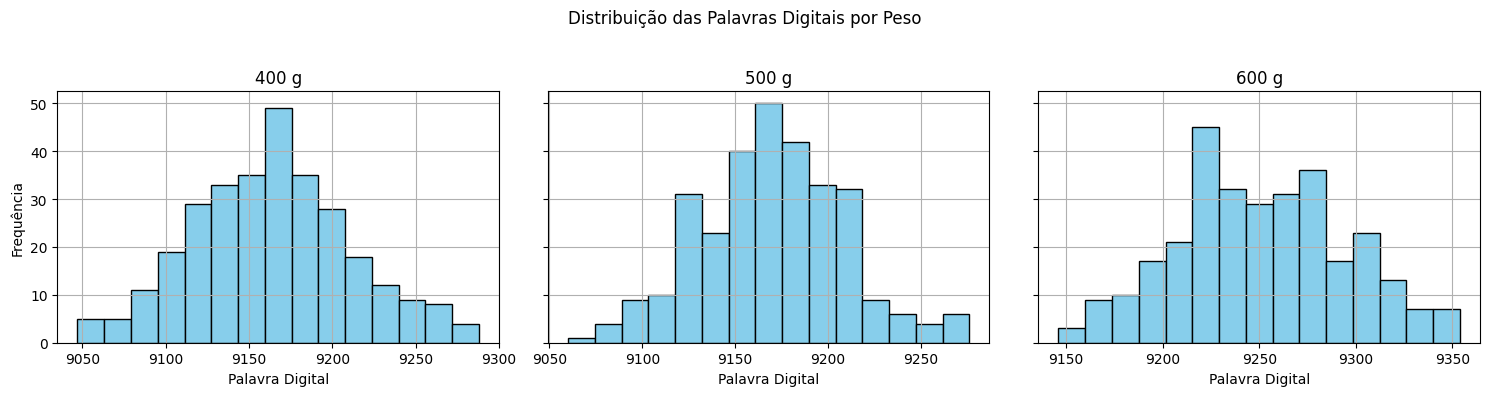

In [37]:
#histogramas
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)  # 1 linha, 3 colunas
for i, peso in enumerate(pesos):
    subset = df[df["peso_g"] == peso]["palavra_digital"]
    axs[i].hist(subset, bins=15, color='skyblue', edgecolor='black')
    axs[i].set_title(f"{peso} g")
    axs[i].set_xlabel("Palavra Digital")
    axs[i].grid(True)

axs[0].set_ylabel("Frequência")
fig.suptitle("Distribuição das Palavras Digitais por Peso")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

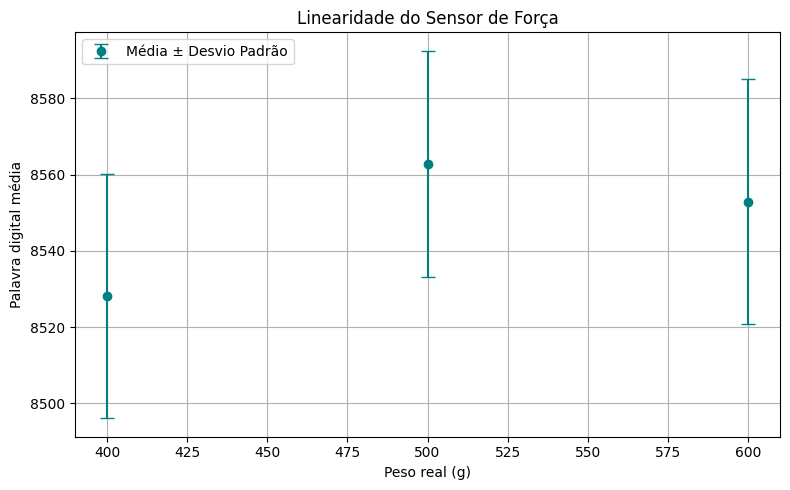

In [10]:

# Agrupa por peso: média e desvio padrão
agrupado = df.groupby("peso_g")["palavra_digital"]
medias = agrupado.mean()
desvios = agrupado.std()

# Eixos
pesos = medias.index.to_numpy()
valores_medios = medias.to_numpy()
valores_erro = desvios.to_numpy()  # Ou: desvios / sqrt(N) para erro padrão da média

# Gráfico de linearidade
plt.figure(figsize=(8, 5))
plt.errorbar(pesos, valores_medios, yerr=valores_erro, fmt='o', capsize=5, label='Média ± Desvio Padrão', color='teal')
plt.title("Linearidade do Sensor de Força")
plt.xlabel("Peso real (g)")
plt.ylabel("Palavra digital média")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Tabela com médias e desvios padrão
tabela = pd.DataFrame({
    "Peso (g)": medias.index,
    "Média Palavra Digital": medias.values,
    "Desvio Padrão": desvios.values
})

# Exibe tabela com 3 casas decimais
print("\n📋 Resumo estatístico por peso:\n")
print(tabela.round(3).to_string(index=False))


📋 Resumo estatístico por peso:

 Peso (g)  Média Palavra Digital  Desvio Padrão
      400               8528.087         32.036
      500               8562.867         29.650
      600               8552.913         32.053
